In [1]:
from data_imports import plt
from data_clean import data, time_based
from ml_model_test import HGBR, HGBR_shap, importance, time_series

In [2]:
clean_df = data()
time_df = time_based(data())
#display(time_df)

In [3]:
lag_df = data()
lag_df['ozone_lag'] = lag_df['O3_ppbV'].shift(1)

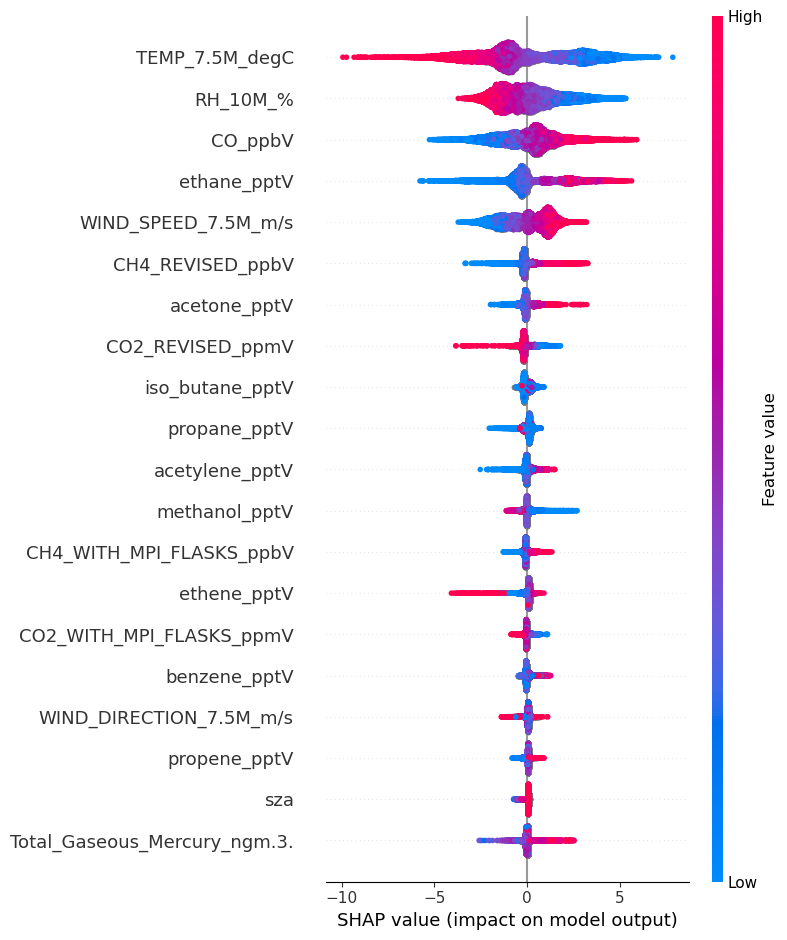

Training Set - MSE: 11.54945, RMSE:  3.39845, MAE:  2.59046, R2:  0.78803
Testing Set  - MSE: 12.02467, RMSE:  3.46766, MAE:  2.65498, R2:  0.77958


In [4]:
HGBR(clean_df, 'O3_ppbV', True, True)

In [5]:
shap_var_df = HGBR_shap(clean_df, 'O3_ppbV', 15)
HGBR(shap_var_df, 'O3_ppbV', False, False)

[[12.649693287663661,
  3.556640730754747,
  2.709372774095105,
  0.7678422845958723],
 [13.077259063134218,
  3.616249308763739,
  2.775509761926114,
  0.7602831005445086]]

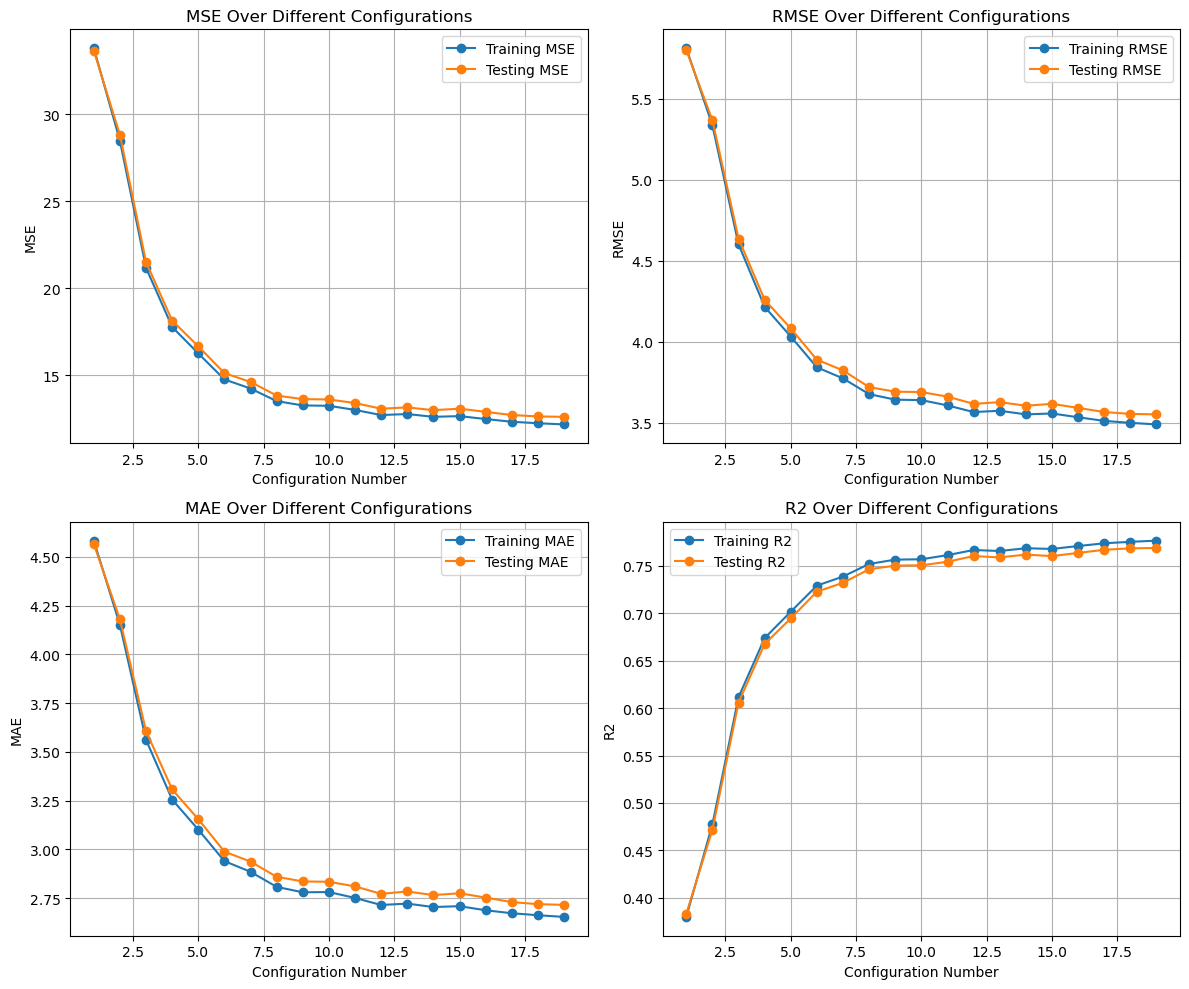

In [6]:
importance(20)

In [11]:
HGBR(lag_df, 'O3_ppbV', False, True)

Training Set - MSE:  0.63190, RMSE:  0.79492, MAE:  0.51959, R2:  0.98840
Testing Set  - MSE:  0.74566, RMSE:  0.86351, MAE:  0.53216, R2:  0.98633


In [15]:
HGBR(time_df, 'O3_ppbV', False, True)

Training Set - MSE:  9.81079, RMSE:  3.13222, MAE:  2.41302, R2:  0.81994
Testing Set  - MSE: 10.33440, RMSE:  3.21472, MAE:  2.47751, R2:  0.81056


In [13]:
range_O3 = time_df['O3_ppbV'].max() - time_df['O3_ppbV'].min()
print(range_O3)
print(time_df['O3_ppbV'].max())
print(time_df['O3_ppbV'].min())
print(time_df['O3_ppbV'].mean())

51.0
58.2
7.2
32.86906356704848


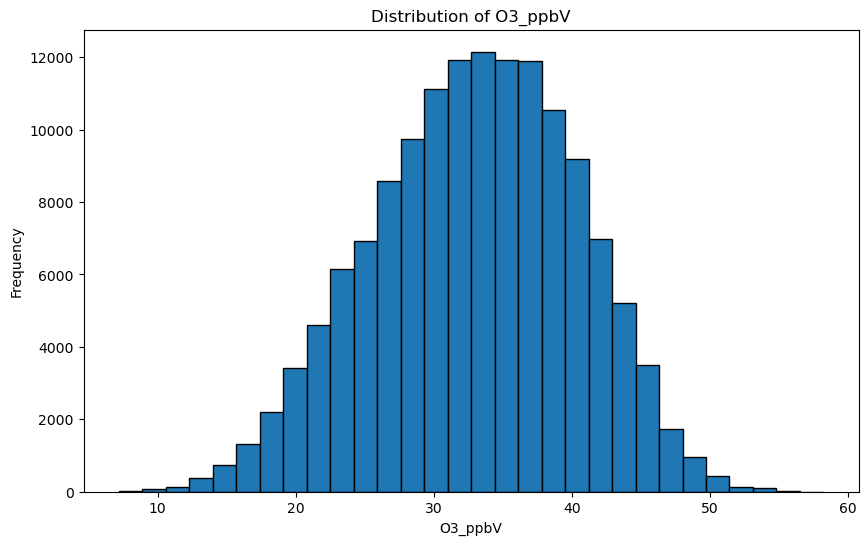

In [17]:
plt.figure(figsize=(10, 6))  
plt.hist(time_df['O3_ppbV'], bins=30, edgecolor='black')

plt.title('Distribution of O3_ppbV')
plt.xlabel('O3_ppbV')
plt.ylabel('Frequency')

plt.show()

In [ ]:
time_series(clean_df, 'O3_ppbV', 5)

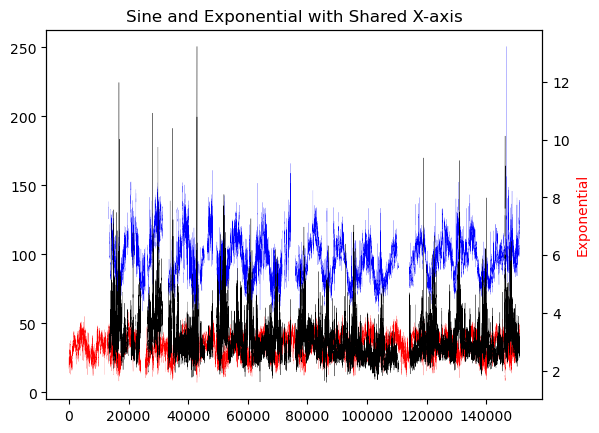

In [20]:
imp_var_df = HGBR_shap(clean_df, 'O3_ppbV', 5)
exc_var_df = imp_var_df.drop(columns = ['O3_ppbV'])
#display(imp_var_df)
#display(exc_var_df)

fig, ax1 = plt.subplots()

# Plot on the first y-axis
ax1.plot(imp_var_df['O3_ppbV'].values, 'r-', linewidth=0.1)
ax1.plot(exc_var_df['CO_ppbV'].values, 'b-', linewidth=0.1)

b = exc_var_df['CO_ppbV']/imp_var_df['O3_ppbV']

# Create a twin y-axis
ax2 = ax1.twinx()
ax2.plot(b.values, color = 'black', linewidth=0.2)
ax2.set_ylabel('Exponential', color='r')

plt.title("Sine and Exponential with Shared X-axis")
plt.show()